In [1]:
import pandas as pd

In [2]:
raw_all_aledb_mut_df = pd.read_pickle('../all_aledb_raw_mut_df.pkl')
iscR_muts = raw_all_aledb_mut_df[raw_all_aledb_mut_df['Gene'] == 'iscR'].copy().reset_index(drop=True)

# AFI values are best as strings for matching against iModDB md.
iscR_muts.ale = iscR_muts.ale.astype(str)
iscR_muts.flask = iscR_muts.flask.astype(str)
iscR_muts.isolate = iscR_muts.isolate.astype(str)

display(iscR_muts.head(), set(iscR_muts.exp))

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source
0,"TOL_2,3-butanediol",8,50,1,1,1.0,2661816,SNP,T→G,T106P (ACC→CCC),iscR,NC_000913,public
1,"TOL_2,3-butanediol",8,50,2,1,1.0,2661816,SNP,T→G,T106P (ACC→CCC),iscR,NC_000913,public
2,application_of_ALE_to_re-optimize_growth_perfo...,16,999,0,1,1.0,2662004,SNP,T→C,E43G (GAA→GGA),iscR,NC_000913,public
3,application_of_ALE_to_re-optimize_growth_perfo...,20,999,0,1,1.0,2662004,SNP,T→C,E43G (GAA→GGA),iscR,NC_000913,public
4,application_of_ALE_to_re-optimize_growth_perfo...,21,999,0,1,1.0,2662004,SNP,T→C,E43G (GAA→GGA),iscR,NC_000913,public


{'Ecoli_Ethanol_Stress_ALE',
 'Isoprenol_TALE',
 'ROS_eAMP',
 'TOL_2,3-butanediol',
 'TOL_putrescine',
 'antibiotic_doxycycline',
 'application_of_ALE_to_re-optimize_growth_performance_of_genome-reduced_strain_MS56-M9-MG1655gbk',
 'pgiKO',
 'unpublished_ALE_experiment_1',
 'unpublished_ALE_experiment_11',
 'unpublished_ALE_experiment_121',
 'unpublished_ALE_experiment_125',
 'unpublished_ALE_experiment_149',
 'unpublished_ALE_experiment_178',
 'unpublished_ALE_experiment_252',
 'unpublished_ALE_experiment_283',
 'unpublished_ALE_experiment_287',
 'unpublished_ALE_experiment_357',
 'unpublished_ALE_experiment_434',
 'unpublished_ALE_experiment_45',
 'unpublished_ALE_experiment_51',
 'unpublished_ALE_experiment_66',
 'unpublished_ALE_experiment_92'}

In [3]:
imoddb_ale_md_df = pd.read_pickle('../data/imodulondb/imoddb_ale_md_df.pkl')
set(imoddb_ale_md_df['ALE exp'])

{'42C',
 'C13',
 'CCK',
 'CCK_GND',
 'CCK_PGI',
 'CCK_PTS',
 'CCK_SDH',
 'CCK_TPIA',
 'EEP',
 'EEP_menF',
 'EEP_menF_entC',
 'EEP_menF_entC_ubiC',
 'EEP_menFubiC',
 'EEP_pdhR-13',
 'EEP_pdhR-14',
 'EEP_pdhR-15',
 'EEP_pdhR-16',
 'EEP_ubiC',
 'FPS ptsI',
 'FPS serB',
 'FPS thrA',
 'GLU',
 'HOT_mutL',
 'Iron-ALE',
 'PAL',
 'ROS_eAMP',
 'SSW_GLU_AC',
 'SSW_GLU_GLY',
 'SSW_GLU_XYL',
 'SSW_GLY',
 'SSW_XYL',
 'pgiBME',
 'pgiPAE'}

In [4]:
imoddb_ale_md_df[['ale', 'flask', 'isolate']] = imoddb_ale_md_df['afir'].apply(lambda s: pd.Series(s.split('.')))
imoddb_ale_md_df.fillna('', inplace=True)
imoddb_ale_md_df.head()

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,afir,ALE exp,ale,flask,isolate
p1k_00125,glu__glu_ale3__1,Glucose Evolution,glu,glu_ale3,1,Escherichia coli GLU.3.412.1,MG1655,Batch,Endpoint,M9,...,,,,,,3.412.1,GLU,3,412,1
p1k_00126,glu__glu_ale4__1,Glucose Evolution,glu,glu_ale4,1,Escherichia coli GLU.4.403.1,MG1655,Batch,Endpoint,M9,...,,,,,,4.403.1,GLU,4,403,1
p1k_00127,glu__glu_ale5__1,Glucose Evolution,glu,glu_ale5,1,Escherichia coli GLU.5.288.1,MG1655,Batch,Endpoint,M9,...,,,,,,5.288.1,GLU,5,288,1
p1k_00128,glu__glu_ale6__1,Glucose Evolution,glu,glu_ale6,1,Escherichia coli GLU.6.406.1,MG1655,Batch,Endpoint,M9,...,,,,,,6.406.1,GLU,6,406,1
p1k_00129,glu__glu_ale8__1,Glucose Evolution,glu,glu_ale8,1,Escherichia coli GLU.8.380.1,MG1655,Batch,Endpoint,M9,...,,,,,,8.380.1,GLU,8,380,1


In [5]:
iscR_muts['iModDB samples'] = ''
for imoddb_sample_id, r in imoddb_ale_md_df.iterrows():
    df = pd.DataFrame()
    if r.isolate == '':
        df = iscR_muts[(iscR_muts.exp == r['ALE exp']) & (iscR_muts['ale'] == r.ale) & (iscR_muts['flask'] == r.flask)]
    else:
        df = iscR_muts[(iscR_muts.exp == r['ALE exp']) & (iscR_muts['ale'] == r.ale) & (iscR_muts['flask'] == r.flask) & (iscR_muts['isolate'] == r.isolate)]
    if len(df) > 0:
        for i, r2 in df.iterrows():
            if iscR_muts.at[i, 'iModDB samples'] == '':
                iscR_muts.at[i, 'iModDB samples'] = set()
            iscR_muts.at[i, 'iModDB samples'].add(imoddb_sample_id)
imoddb_iscR_muts = iscR_muts[iscR_muts['iModDB samples'] != ''].copy()
imoddb_iscR_muts['AA sub'] = imoddb_iscR_muts.Details.apply(lambda s: s.split(' ')[0])
imoddb_iscR_muts.to_pickle('./imoddb_iscR_mut_df.pkl')
imoddb_iscR_muts

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,iModDB samples,AA sub
21,ROS_eAMP,1,112,0,1,0.36,2662029,SNP,G→C,Q35E (CAG→GAG),iscR,NC_000913,public,"{p1k_00517, p1k_00511, p1k_00513, p1k_00515, p...",Q35E
22,ROS_eAMP,1,112,0,1,0.64,2661816,SNP,T→G,T106P (ACC→CCC),iscR,NC_000913,public,"{p1k_00517, p1k_00511, p1k_00513, p1k_00515, p...",T106P
23,ROS_eAMP,1,112,1,1,1.00,2661816,SNP,T→G,T106P (ACC→CCC),iscR,NC_000913,public,"{p1k_00517, p1k_00511, p1k_00513, p1k_00515, p...",T106P
31,ROS_eAMP,11,83,0,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00543, p1k_00542, p1k_00540, p1k_00544, p...",V55L
32,ROS_eAMP,11,83,1,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00543, p1k_00542, p1k_00540, p1k_00544, p...",V55L
37,ROS_eAMP,13,87,0,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00550, p1k_00551, p1k_00549, p1k_00547, p...",V55L
38,ROS_eAMP,13,87,1,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00550, p1k_00551, p1k_00549, p1k_00547, p...",V55L
39,ROS_eAMP,16,32,0,1,0.51,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00563, p1k_00564, p1k_00567, p1k_00566, p...",V55L
40,ROS_eAMP,16,32,1,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00563, p1k_00564, p1k_00567, p1k_00566, p...",V55L
41,ROS_eAMP,17,104,0,1,1.00,2661969,SNP,C→G,V55L (GTT→CTT),iscR,NC_000913,public,"{p1k_00568, p1k_00574, p1k_00569, p1k_00571, p...",V55L


In [6]:
from pymodulon.io import *

ica = load_json_model('../data/imods/precise1k_with_ygfZ_muts.json.gz')
all_imoddb_md_df = pd.read_csv('../data/imodulondb/sample_table.csv', index_col=0)

In [7]:
iscR_1_2_imod_act_df = ica.A.loc[['Suf System', 'Isc System']].T
iscR_1_2_imod_act_df['iscR mutation'] = ''
for _, r in imoddb_iscR_muts.iterrows():
    for imoddb_sample_id in r['iModDB samples']:
        iscR_1_2_imod_act_df.at[imoddb_sample_id, 'iscR mutation'] = 'iscR ' + r['AA sub']
iscR_1_2_imod_act_df['iscR mutation'] = iscR_1_2_imod_act_df['iscR mutation'].apply(lambda s: 'none' if s == '' else s)

iscR_1_2_imod_act_df['Strain Description'] = iscR_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Strain Description'] if r.name in all_imoddb_md_df.index else '',axis=1)
iscR_1_2_imod_act_df['Supplement'] = iscR_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Supplement'] if r.name in all_imoddb_md_df.index else '',axis=1)
iscR_1_2_imod_act_df['project'] = iscR_1_2_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'project'] if r.name in all_imoddb_md_df.index else '',axis=1)
iscR_1_2_imod_act_df.fillna('', inplace=True)

In [8]:
# Checking with NB combining mutations from all genes
iscR_1_2_imod_act_df[iscR_1_2_imod_act_df['iscR mutation'] != 'none']

,Suf System,Isc System,iscR mutation,Strain Description,Supplement,project
p1k_00562,-1.612886,1.234742,iscR V55L,Escherichia coli ERS.16.32,,ros_tale
p1k_00563,-1.528415,1.319115,iscR V55L,Escherichia coli ERS.16.32,,ros_tale
p1k_00564,1.618016,3.732104,iscR V55L,Escherichia coli ERS.16.32,paraquat (250uM),ros_tale
p1k_00565,0.851477,3.641653,iscR V55L,Escherichia coli ERS.16.32,paraquat (250uM),ros_tale
p1k_00566,1.402702,-1.266226,iscR V55L,Escherichia coli ERS.16.32,paraquat (750uM),ros_tale
...,...,...,...,...,...,...
p1k_00529,-0.752398,2.173002,iscR C98G,Escherichia coli ERS.7.103,,ros_tale
p1k_00530,2.338232,4.915304,iscR C98G,Escherichia coli ERS.7.103,paraquat (250uM),ros_tale
p1k_00531,2.490227,4.878951,iscR C98G,Escherichia coli ERS.7.103,paraquat (250uM),ros_tale
p1k_00532,2.459733,5.364258,iscR C98G,Escherichia coli ERS.7.103,paraquat (750uM),ros_tale


In [9]:
import re


proj_w_iscR_vars = set(iscR_1_2_imod_act_df[iscR_1_2_imod_act_df['iscR mutation'] != 'none'].project)
iscR_proj_imod_act_df = iscR_1_2_imod_act_df[iscR_1_2_imod_act_df.project.isin(proj_w_iscR_vars)].copy()
# iscR_proj_imod_act_df['PQ (μM)'] = iscR_proj_imod_act_df['Supplement'].apply(lambda s: 'none' if s == '' else s)  # Better for plots
iscR_proj_imod_act_df['paraquat (μM)'] = iscR_proj_imod_act_df['Supplement'].apply(lambda s: '0' if s == '' else s)  # Better for plots
iscR_proj_imod_act_df['paraquat (μM)'] = iscR_proj_imod_act_df['paraquat (μM)'].apply(lambda s: s.replace('paraquat (', ''))  # Better for plot legend
iscR_proj_imod_act_df['paraquat (μM)'] = iscR_proj_imod_act_df['paraquat (μM)'].apply(lambda s: s.replace('uM)', ''))  # Better for plo

def _update_strain_description(sample_d):
    sd = sample_d['Strain Description']
    sd = sd.replace('Escherichia coli ', '')
    sd = sd.replace('K-12 MG1655', '')
    # sd = sd.replace('OxyR.', 'FeSO4 ALE ')
    sd = sd.replace('ERS.', 'paraquat ALE ')

        # Remove the ALE numbers
    if sample_d['iscR mutation'] != 'none':
        m = re.search(r"\d", sd)
        sd = sd[:m.start()-1]

    if sample_d['iscR mutation'] == 'none':
        if sample_d['project'] == 'ros_tale':
            sd = 'no IscR mutation'
        if "ALE4" in sample_d['Strain Description']:
            sd = 'no IscR mutation'

    return sd

iscR_proj_imod_act_df['Strain Description'] = iscR_proj_imod_act_df.apply(lambda r: _update_strain_description(r), axis=1)
set(iscR_proj_imod_act_df['Strain Description'])

{'no IscR mutation', 'paraquat ALE'}

In [10]:
# iscR_proj_imod_act_df['Strain'] = iscR_proj_imod_act_df.apply(
#     lambda r: r['iscR mutation'] + ' ' + r['Strain Description'] if r['iscR mutation'] != 'none' else r['Strain Description'],
#     axis=1
#     )
# display(set(iscR_proj_imod_act_df.Strain))

In [11]:
iscR_proj_imod_act_df['iscR mutation'] = iscR_proj_imod_act_df['iscR mutation'].apply(lambda s: s.replace('iscR ', ''))
iscR_proj_imod_act_df['Strain'] = iscR_proj_imod_act_df.apply(
    lambda r: r['iscR mutation'] + ' (' + r['Strain Description'] + ')' if r['iscR mutation'] != 'none' else r['Strain Description'],
    axis=1
    )
display(set(iscR_proj_imod_act_df.Strain))

{'A13T (paraquat ALE)',
 'C104S (paraquat ALE)',
 'C98G (paraquat ALE)',
 'T106P (paraquat ALE)',
 'V55L (paraquat ALE)',
 'V87A (paraquat ALE)',
 'no IscR mutation'}

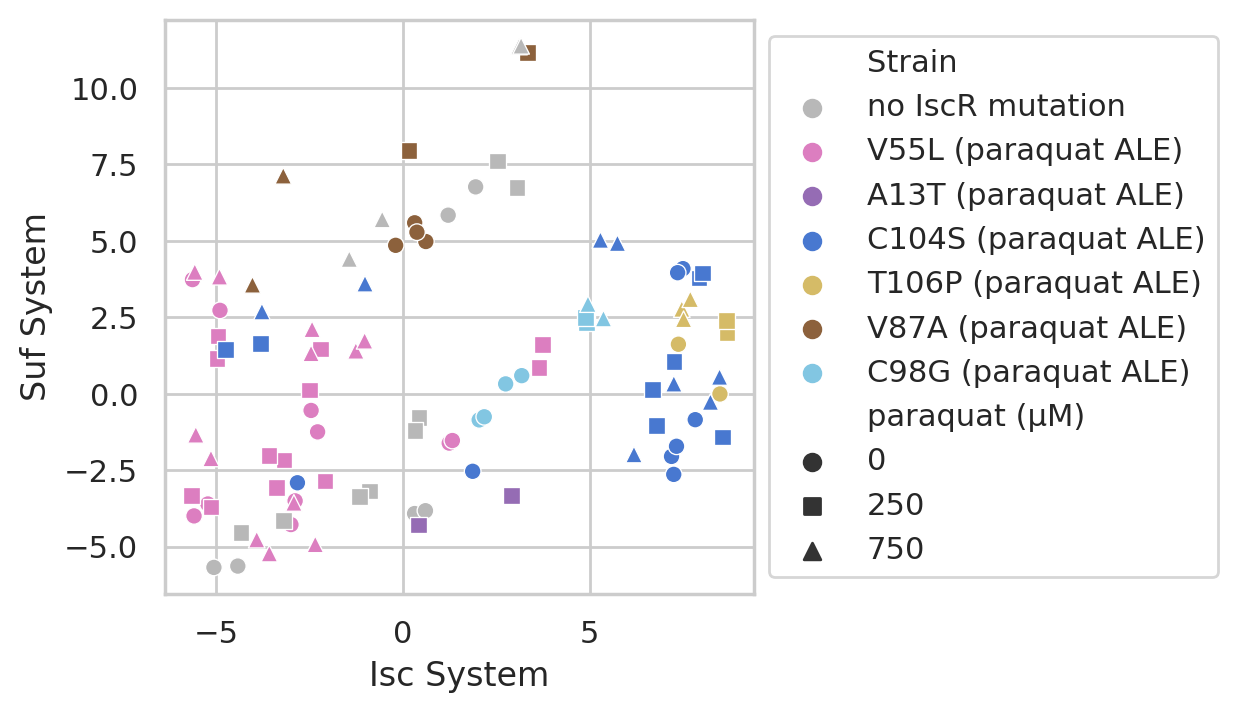

In [12]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_theme(
    style="whitegrid",
    # palette="muted"
)

# Width of 4 is best for keeping dots from substantial overlap
figure(figsize=(3.8, 3.8), dpi=200)

# strain_clr_d = {
#     'WT iscR E. coli paraquat ALE': '#B3B3B3',
#     'Starting strain E. coli paraquat ALE': 'black',
#     'iscR A13T E. coli paraquat ALE 18.24': '#FD3216',
#  'iscR C104S E. coli paraquat ALE 18.36': '#00FE35',
#  'iscR C104S E. coli paraquat ALE 21.97': '#6A76FC',
#  'iscR C104S E. coli paraquat ALE 25.111': '#FED4C4',
#  'iscR C104S E. coli paraquat ALE 29.119': '#FE00CE',
#  'iscR C98G E. coli paraquat ALE 7.103': '#0DF9FF',
#  'iscR T106P E. coli paraquat ALE 1.112': '#C58B72',
#  'iscR V55L E. coli paraquat ALE 11.83': '#FF9616',
#  'iscR V55L E. coli paraquat ALE 13.87': '#479B55',
#  'iscR V55L E. coli paraquat ALE 16.32': '#EEA6FB',
#  'iscR V55L E. coli paraquat ALE 17.104': '#DC587D',
#  'iscR V55L E. coli paraquat ALE 19.91': '#D626FF',
#  'iscR V87A E. coli paraquat ALE 3.76': '#00B5F7'
#  }

strain_clr_d = {
    # 'Starting strain E. coli paraquat ALE': 'black',
    #  'WT iscR E. coli paraquat ALE': '#B3B3B3',
    'A13T (paraquat ALE)': '#956CB4',
    'C104S (paraquat ALE)': '#4878D0',
    'C98G (paraquat ALE)': '#82C6E2',
    'T106P (paraquat ALE)': '#D5BB67',
    'V55L (paraquat ALE)': '#DC7EC0',
    'V87A (paraquat ALE)': '#8C613C',
    'no IscR mutation': '#B8B8B8',
}

# m_d = {'none': 'D', 'paraquat (250uM)': 's', 'paraquat (750uM)': '^'}
m_d = {'0': 'o', '250': 's', '750': '^'}

# Towards getting the colored dots on top of the grey dots, though screws the legend up.
# ax = sns.scatterplot(data=iscR_proj_imod_act_df[iscR_proj_imod_act_df['iscR mutation']=='none'], x='iscR-1', y='iscR-2', hue='strain', palette=strain_clr_d, style='Supplement', markers=m_d)
# sns.scatterplot(ax=ax, data=iscR_proj_imod_act_df[iscR_proj_imod_act_df['iscR mutation']!='none'], x='iscR-1', y='iscR-2', hue='strain', palette=strain_clr_d, style='Supplement', markers=m_d)

ax = sns.scatterplot(data=iscR_proj_imod_act_df, x='Isc System', y='Suf System',
                     hue='Strain', palette=strain_clr_d, style='paraquat (μM)', markers=m_d)
# ax.set(xlabel="iscR-1 iModulon activity")
# ax.set(ylabel="iscR-2 iModulon activity")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          # title='iscR variants'
          )

In [13]:
samples_to_drop = iscR_proj_imod_act_df.index.tolist()

# Removing all samples in other categories
other_sample_imod_act_df = ica.A.loc[['Suf System', 'Isc System']].T
other_sample_imod_act_df.drop(samples_to_drop, inplace=True)
assert(len(set(samples_to_drop) & set(other_sample_imod_act_df.index.tolist())) == 0)
# all_others_cat_name = 'all other iModulon samples (' + str(len(other_sample_imod_act_df)) + ')'
all_others_cat_name = 'no IscR mutation'
other_sample_imod_act_df['Strain'] = all_others_cat_name
other_sample_imod_act_df['paraquat (μM)'] = '0'
other_sample_imod_act_df.head()

,Suf System,Isc System,Strain,paraquat (μM)
p1k_00001,-0.429887,0.100512,no IscR mutation,0
p1k_00002,0.429887,-0.100512,no IscR mutation,0
p1k_00003,8.919075,1.470212,no IscR mutation,0
p1k_00004,8.992567,1.338541,no IscR mutation,0
p1k_00005,-1.885191,-0.539587,no IscR mutation,0


In [14]:
all_sample_imod_act_df = pd.concat([iscR_proj_imod_act_df, other_sample_imod_act_df])

amount_of_samples_per_cat = all_sample_imod_act_df.groupby(['paraquat (μM)']).size().reset_index(name='counts')
amount_of_samples_per_cat_d = {}
for _, r in amount_of_samples_per_cat.iterrows():
    amount_of_samples_per_cat_d[r['paraquat (μM)']] = r['counts']
display(amount_of_samples_per_cat_d)
all_sample_imod_act_df['paraquat (μM)'] = all_sample_imod_act_df['paraquat (μM)'].apply(lambda s: 
    s + " (" + str(amount_of_samples_per_cat_d[s]) + " samples)")
all_sample_imod_act_df['paraquat (μM)'].unique()

{'0': 980, '250': 36, '750': 31}

array(['0 (980 samples)', '250 (36 samples)', '750 (31 samples)'],
      dtype=object)

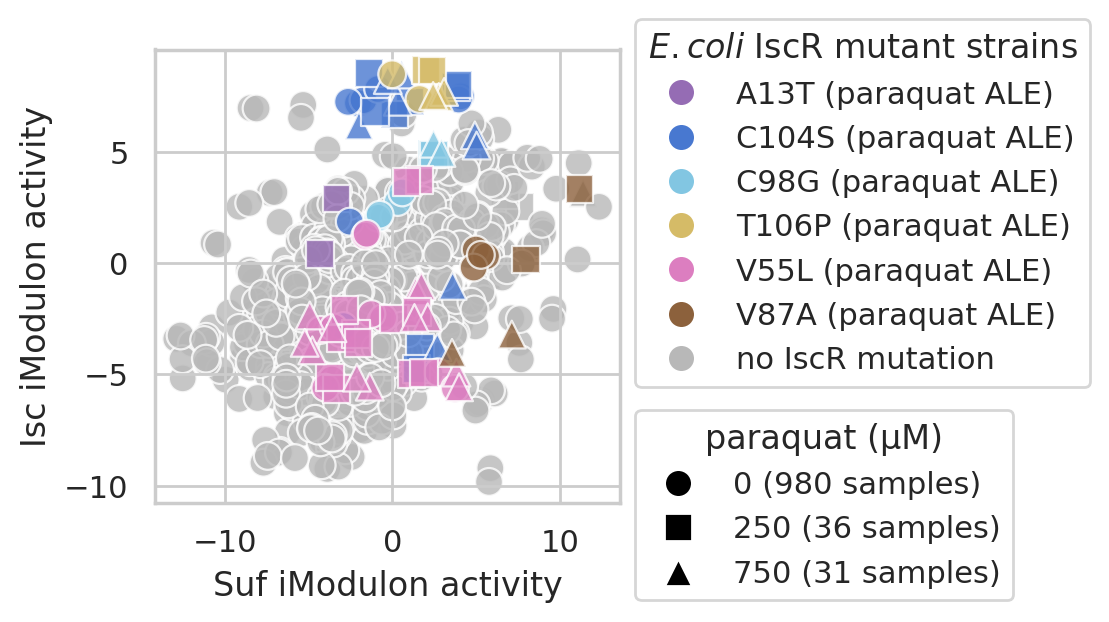

In [15]:
figure(figsize=(3, 3), dpi=200)

strains_z_order = [
    'no IscR mutation',
    'A13T (paraquat ALE)',
    'C104S (paraquat ALE)',
    'C98G (paraquat ALE)',
    'T106P (paraquat ALE)',
    'V55L (paraquat ALE)',
    'V87A (paraquat ALE)',
]

hue_z_order = [strain_clr_d[k] for k in strains_z_order]

m_d = {'0 (980 samples)': 'o', '250 (36 samples)': 's', '750 (31 samples)': '^'}

for z_order, s in enumerate(strains_z_order):
    df = all_sample_imod_act_df[all_sample_imod_act_df.Strain == s]
    sns.scatterplot(
        data=df, x='Suf System', y='Isc System',
        hue='Strain',
        palette=strain_clr_d, style='paraquat (μM)', markers=m_d,
        zorder=z_order,
        s=100,
        alpha=0.8,
    )

legend_colors = [plt.Line2D([0], [0], marker='o', linestyle="None", color=color, label=color_name, markerfacecolor=color, markersize=8) for color_name, color in strain_clr_d.items()]
legend1 = plt.legend(handles=legend_colors, title="$\it{E. coli}$ IscR mutant strains", loc="upper left", bbox_to_anchor=(1, 1.1))

legend_shapes = [plt.Line2D([0], [0], marker=marker, linestyle="None", color='w', label=group, markerfacecolor='black', markersize=10) for group, marker in m_d.items()]
legend2 = plt.legend(handles=legend_shapes, title="paraquat (μM)", loc="lower left", bbox_to_anchor=(1, -0.25), ncol=1)

ax = plt.gca()
ax.add_artist(legend1)  # Add the first legend back (it gets removed when the second legend is added)
ax.set(xlabel="Suf iModulon activity")
ax.set(ylabel="Isc iModulon activity")

plt.savefig("f5c.svg")